there are 25 lora experiments and 60 lorsa experiments within bounds
rank0_1e-4_1e-3 has size 0 and score 0.6168831168831169
rank0_1e-4_1e-4 has size 0 and score 0.5202922077922078
rank0_1e-4_1e-5 has size 0 and score 0.5803571428571429
rank0_1e-4_1e-6 has size 0 and score 0.5746753246753247
rank0_1e-5_1e-2 has size 0 and score 0.5900974025974026
rank0_1e-5_1e-3 has size 1506 and score 0.612012987012987
rank0_1e-5_1e-4 has size 91803 and score 0.627435064935065
rank0_1e-6_1e-2 has size 0 and score 0.5438311688311688
rank0_1e-6_1e-3 has size 4407 and score 0.6103896103896104
rank0_1e-6_1e-4 has size 266283 and score 0.588474025974026
rank0_1e-6_2e-4 has size 92409 and score 0.6387987012987013
rank0_1e-6_3e-4 has size 54870 and score 0.5795454545454546
rank0_1e-6_4e-4 has size 35958 and score 0.650974025974026
rank0_1e-6_5e-4 has size 25734 and score 0.512987012987013
rank0_1e-6_6e-5 has size 662430 and score 0.7183441558441559
rank0_1e-6_8e-5 has size 397356 and score 0.702922077922078


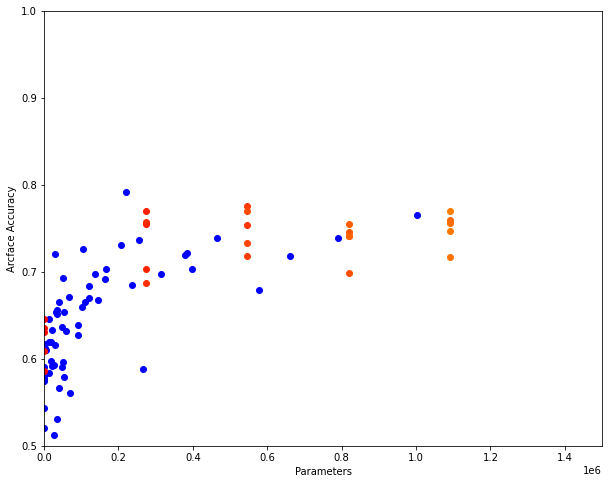

In [4]:


file = open('output.txt', 'r')
output = file.read()

data = {}
rows = output.split('\n')
for row in rows:
    if 'scores' in row:
        words = row.split(' ')
        pathpieces = words[2].split('/')
        name = pathpieces[5]
        score = float(words[-1])
        if name in data.keys():
            data[name]['score'] = score
        else:
            data[name] = {'score': score}
    elif '.pth' in row:
        words = row.split(' ')
        size = int(words[0])
        pathpieces = words[1].split('/')
        name = pathpieces[5]
        if name in data.keys():
            data[name]['size'] = size
        else:
            data[name] = {'size': size}

# unroll the dictionary into parallel lists
names = sorted(data.keys())
scores = []
sizes = []
for key in names:
    try:
        scores.append(data[key]['score'])
        sizes.append(data[key]['size'])
    except:
        print(f'{key} was not fully evaluated; skipping')

# separate the lists for lora vs lorsa
loranames = []
lorascores = []
lorasizes = []
lorsanames = []
lorsascores = []
lorsasizes = []
# filter bounds for score and size
scorelowerbound = 0.5
sizeupperbound = 1.5e6
for i in range(len(names)):
    if scores[i] < scorelowerbound:
        continue
    if sizes[i] > sizeupperbound:
        continue
    if 'LoRSA' in names[i]:
        # Also exclude the ones that have only shrinkage threshold and no l1
        if names[i].split('_')[6] == '0':
            continue
        # Actually shorten the name so it's more reasonable to put in the plot legend
        newname = 'rank' + '_'.join(names[i].split('_B')[1].split('_')[:3])
        lorsanames.append(newname)
        lorsascores.append(scores[i])
        lorsasizes.append(sizes[i])
    else:
        newname = 'rank' + '_'.join(names[i].split('_B')[1].split('_')[:3])
        loranames.append(newname)
        lorascores.append(scores[i])
        lorasizes.append(sizes[i])

print(f'there are {len(loranames)} lora experiments and {len(lorsanames)} lorsa experiments within bounds')



import matplotlib.pyplot as plt

import numpy as np
import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (10,8)

# colors = cm.winter(np.linspace(0, 1, len(lorsanames)))
# for i in range(len(lorsanames)):
#     plt.scatter(lorsasizes[i], lorsascores[i], label=lorsanames[i], color=colors[i])
colors = cm.winter(np.linspace(0, 1, 11))
for i in range(len(lorsanames)):
    print(f'{lorsanames[i]} has size {lorsasizes[i]} and score {lorsascores[i]}')
    # index = int(lorsanames[i].split('_')[1][0]) if float(lorsanames[i].split('_')[2]) == 0 else 0
    index = 0
    if index == 1 and int(lorsanames[i].split('_')[1][-1]) == 4: index = 10
    # if lorsanames[i].split('_')[2] != '0': 
        # index = int(float(lorsanames[i].split('_')[2]) * 3e4)
        # print(index)
    plt.scatter(lorsasizes[i], lorsascores[i], label=lorsanames[i], color=colors[index])
colors = cm.autumn(np.linspace(0, 1, len(loranames)*2))
for i in range(len(loranames)):
    plt.scatter(lorasizes[i], lorascores[i], label=loranames[i], color=colors[i])
plt.ylabel("Arcface Accuracy")
plt.xlim(0, sizeupperbound)
plt.ylim(scorelowerbound, 1)
# plt.legend()
plt.xlabel("Parameters")
plt.show()

### Coding scratchpad

In [14]:
# clean up the output_old.txt file

file = open('output_old.txt', 'r')
output = file.read()

lora_score_rows = {}
lora_size_rows = {}
rows = output.split('\n')
for i in range(len(rows)):
    row = rows[i]
    if 'scores' in row:
        words = row.split(' ')
        pathpieces = words[2].split('/')
        name = pathpieces[5]
        if 'LoRA' in name and 'potter' in name:
            lora_score_rows[name] = i
    elif '.pth' in row:
        words = row.split(' ')
        size = int(words[0])
        pathpieces = words[1].split('/')
        name = pathpieces[5]
        if 'LoRA' in name and 'potter' in name:
            lora_size_rows[name] = i

for name in lora_score_rows.keys():
    print(rows[lora_score_rows[name]])
    print(rows[lora_size_rows[name]])            

        

scores for /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B0_Repeat500/visualization/PromptDataset/Iters-latest_Alpha-1.0 0.6528028933092225 0.586038961038961
0 /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B0_Repeat500/models/edlora_model-latest.pth
scores for /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B2_Repeat500/visualization/PromptDataset/Iters-latest_Alpha-1.0 0.8294642857142858 0.7540584415584416
546048 /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B2_Repeat500/models/edlora_model-latest.pth
scores for /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B4_Repeat500/visualization/PromptDataset/Iters-latest_Alpha-1.0 0.8357142857142857 0.7597402597402597
1092096 /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B4_Repeat500/models/edlora_model-latest.pth
scores for /home/sarafk/Mix-of-Show/experiments/8101_EDLoRA_potter_Cmix_B3_Repeat500/visualization/PromptDataset/Iters-latest_Alpha-1.0 0.76875 0.6

In [38]:
name = '8101_EDLoRSA_potter_Cmix_B1_1e-4_0_Repeat500'
shrinkage = 1e-4
shrinkagestr = f'{shrinkage:.0e}'
# annoying process to remove leading 0s from the exponent
if '0' in shrinkagestr.split('e')[-1]:
    pieces = shrinkagestr.split('0')
    shrinkagestr = ''.join(pieces)
print(shrinkagestr)
pieces = name.split(shrinkagestr)
print(pieces)
newshrinkage = '1e-3'
newname = pieces[0] + newshrinkage + pieces[1]
print(newname)

1e-4
['8101_EDLoRSA_potter_Cmix_B1_', '_0_Repeat500']
8101_EDLoRSA_potter_Cmix_B1_1e-3_0_Repeat500
